In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

In [2]:
plt.style.use("my-mpl.mplstyle")

## Data loading and transformation

In [3]:
files = glob("../data/data_for_final_presentation/*.csv")

In [4]:
dfs = []

for file_name in files:
    t = pd.read_csv(file_name)
    t['file_name'] = file_name.split("/")[-1].split(".")[0]
    dfs.append(t)


dfs = pd.concat(dfs)
dfs.columns = ["lambda", "metric"] + dfs.columns[2:].tolist()
dfs['model_type'] = np.where(dfs.file_name.str.contains('dist'), "Distillation", "Anchor")

In [5]:
dfs = (dfs.groupby(['lambda', 'model_type', 'metric'],
       as_index=False)[['baseline', 'add_unlab', 'anchor', 'teacher']]
       .mean()
       .reset_index()
       .round(2))

In [6]:
dfs_pivoted = dfs.pivot_table(index=['lambda', 'model_type'],
                              columns=['metric'],
                              values=['baseline', 'add_unlab', 'anchor'])

In [7]:
dfs_pivoted[('add_unlab', 'churn_ratio')] = dfs_pivoted[('add_unlab', 'gchurns_val')] \
                                            / dfs_pivoted[('add_unlab', 'bchurns_val')]
dfs_pivoted[('anchor', 'churn_ratio')] = dfs_pivoted[('anchor', 'gchurns_val')] \
                                         / dfs_pivoted[('anchor', 'bchurns_val')]
dfs_pivoted[('baseline', 'churn_ratio')] = dfs_pivoted[('baseline', 'gchurns_val')] \
                                           / dfs_pivoted[('baseline', 'bchurns_val')]

In [8]:
dfs_pivoted = dfs_pivoted.reset_index()

n_observations = 8000

dfs_pivoted[('add_unlab', 'overall_churn')] = ((dfs_pivoted[('add_unlab', 'gchurns_val')]
                                                + dfs_pivoted[('add_unlab','bchurns_val')])
                                               / n_observations).round(3) * 100

dfs_pivoted[('baseline', 'overall_churn')] = ((dfs_pivoted[('baseline', 'gchurns_val')]
                                               + dfs_pivoted[('baseline','bchurns_val')])
                                              / n_observations).round(3) * 100

dfs_pivoted[('anchor', 'overall_churn')] = ((dfs_pivoted[('anchor', 'gchurns_val')]
                                             + dfs_pivoted[('anchor','bchurns_val')])
                                            / n_observations).round(3) * 100

dfs_pivoted[('composite', 'gchurn_change')] = ((dfs_pivoted[('add_unlab', 'gchurns_val')]
                                                - dfs_pivoted[('anchor', 'gchurns_val')])
                                                / dfs_pivoted[('add_unlab', 'gchurns_val')]).round(3) * 100

dfs_pivoted[('composite', 'bchurn_change')] = ((dfs_pivoted[('add_unlab', 'bchurns_val')]
                                                - dfs_pivoted[('anchor', 'bchurns_val')])
                                                / dfs_pivoted[('add_unlab', 'bchurns_val')]).round(3) * 100

In [9]:
dfs

,index,lambda,model_type,metric,baseline,add_unlab,anchor,teacher
0,0,0.0,Anchor,accuracies_val,91.46,91.86,91.52,92.04
1,1,0.0,Anchor,bchurns_val,277.40,201.80,271.80,NaN
2,2,0.0,Anchor,churn_ratio,0.62,0.72,0.64,NaN
3,3,0.0,Anchor,gchurns_val,171.00,143.40,172.00,NaN
4,4,0.0,Distillation,accuracies_val,91.49,91.88,91.40,92.11
5,5,0.0,Distillation,bchurns_val,269.60,205.20,281.80,NaN
6,6,0.0,Distillation,gchurns_val,161.40,136.20,167.00,NaN
7,7,0.3,Anchor,accuracies_val,91.46,91.80,91.71,92.04
8,8,0.3,Anchor,bchurns_val,277.40,184.80,243.80,NaN
9,9,0.3,Anchor,churn_ratio,0.62,0.69,0.66,NaN


## Visualization


1. Two line plots with overall churn shared y-axis
2. Two bar plot for % change for bad and good churn shared y-axis

### Accuracy

In [10]:
anchor_method = dfs_pivoted[dfs_pivoted[('model_type')] == 'Anchor']
distillation_method = dfs_pivoted[dfs_pivoted[('model_type')] == 'Distillation']

In [11]:
anchor_method

lambda model_type      add_unlab                                      \
metric                   accuracies_val bchurns_val churn_ratio gchurns_val   
0         0.0     Anchor          91.86       201.8    0.710605       143.4   
2         0.3     Anchor          91.80       184.8    0.681818       126.0   
4         0.5     Anchor          91.88       177.4    0.713641       126.6   
6         0.7     Anchor          91.91       167.8    0.710369       119.2   
8         0.9     Anchor          91.89       168.6    0.711744       120.0   

               anchor                                           baseline  \
metric accuracies_val bchurns_val churn_ratio gchurns_val accuracies_val   
0               91.52       271.8    0.632818       172.0          91.46   
2               91.71       243.8    0.656276       160.0          91.46   
4               91.84       222.4    0.681655       151.6          91.46   
6               91.84       204.4    0.707436       144.6          91.46   
8               91.92       193.8    0.711042       137.8          91.46   

                                               add_unlab      baseline  \
metric bchurns_val churn_ratio gchurns_val overall_churn overall_churn   
0            277.4    0.616438       171.0           4.3           5.6   
2            277.4    0.616438       171.0           3.9           5.6   
4            277.4    0.616438       171.0           3.8           5.6   
6            277.4    0.616438       171.0           3.6           5.6   
8            277.4    0.616438       171.0           3.6           5.6   

              anchor     composite                
metric overall_churn gchurn_change bchurn_change  
0                5.5         -19.9         -34.7  
2                5.0         -27.0         -31.9  
4                4.7         -19.7         -25.4  
6                4.4         -21.3         -21.8  
8                4.1         -14.8         -14.9

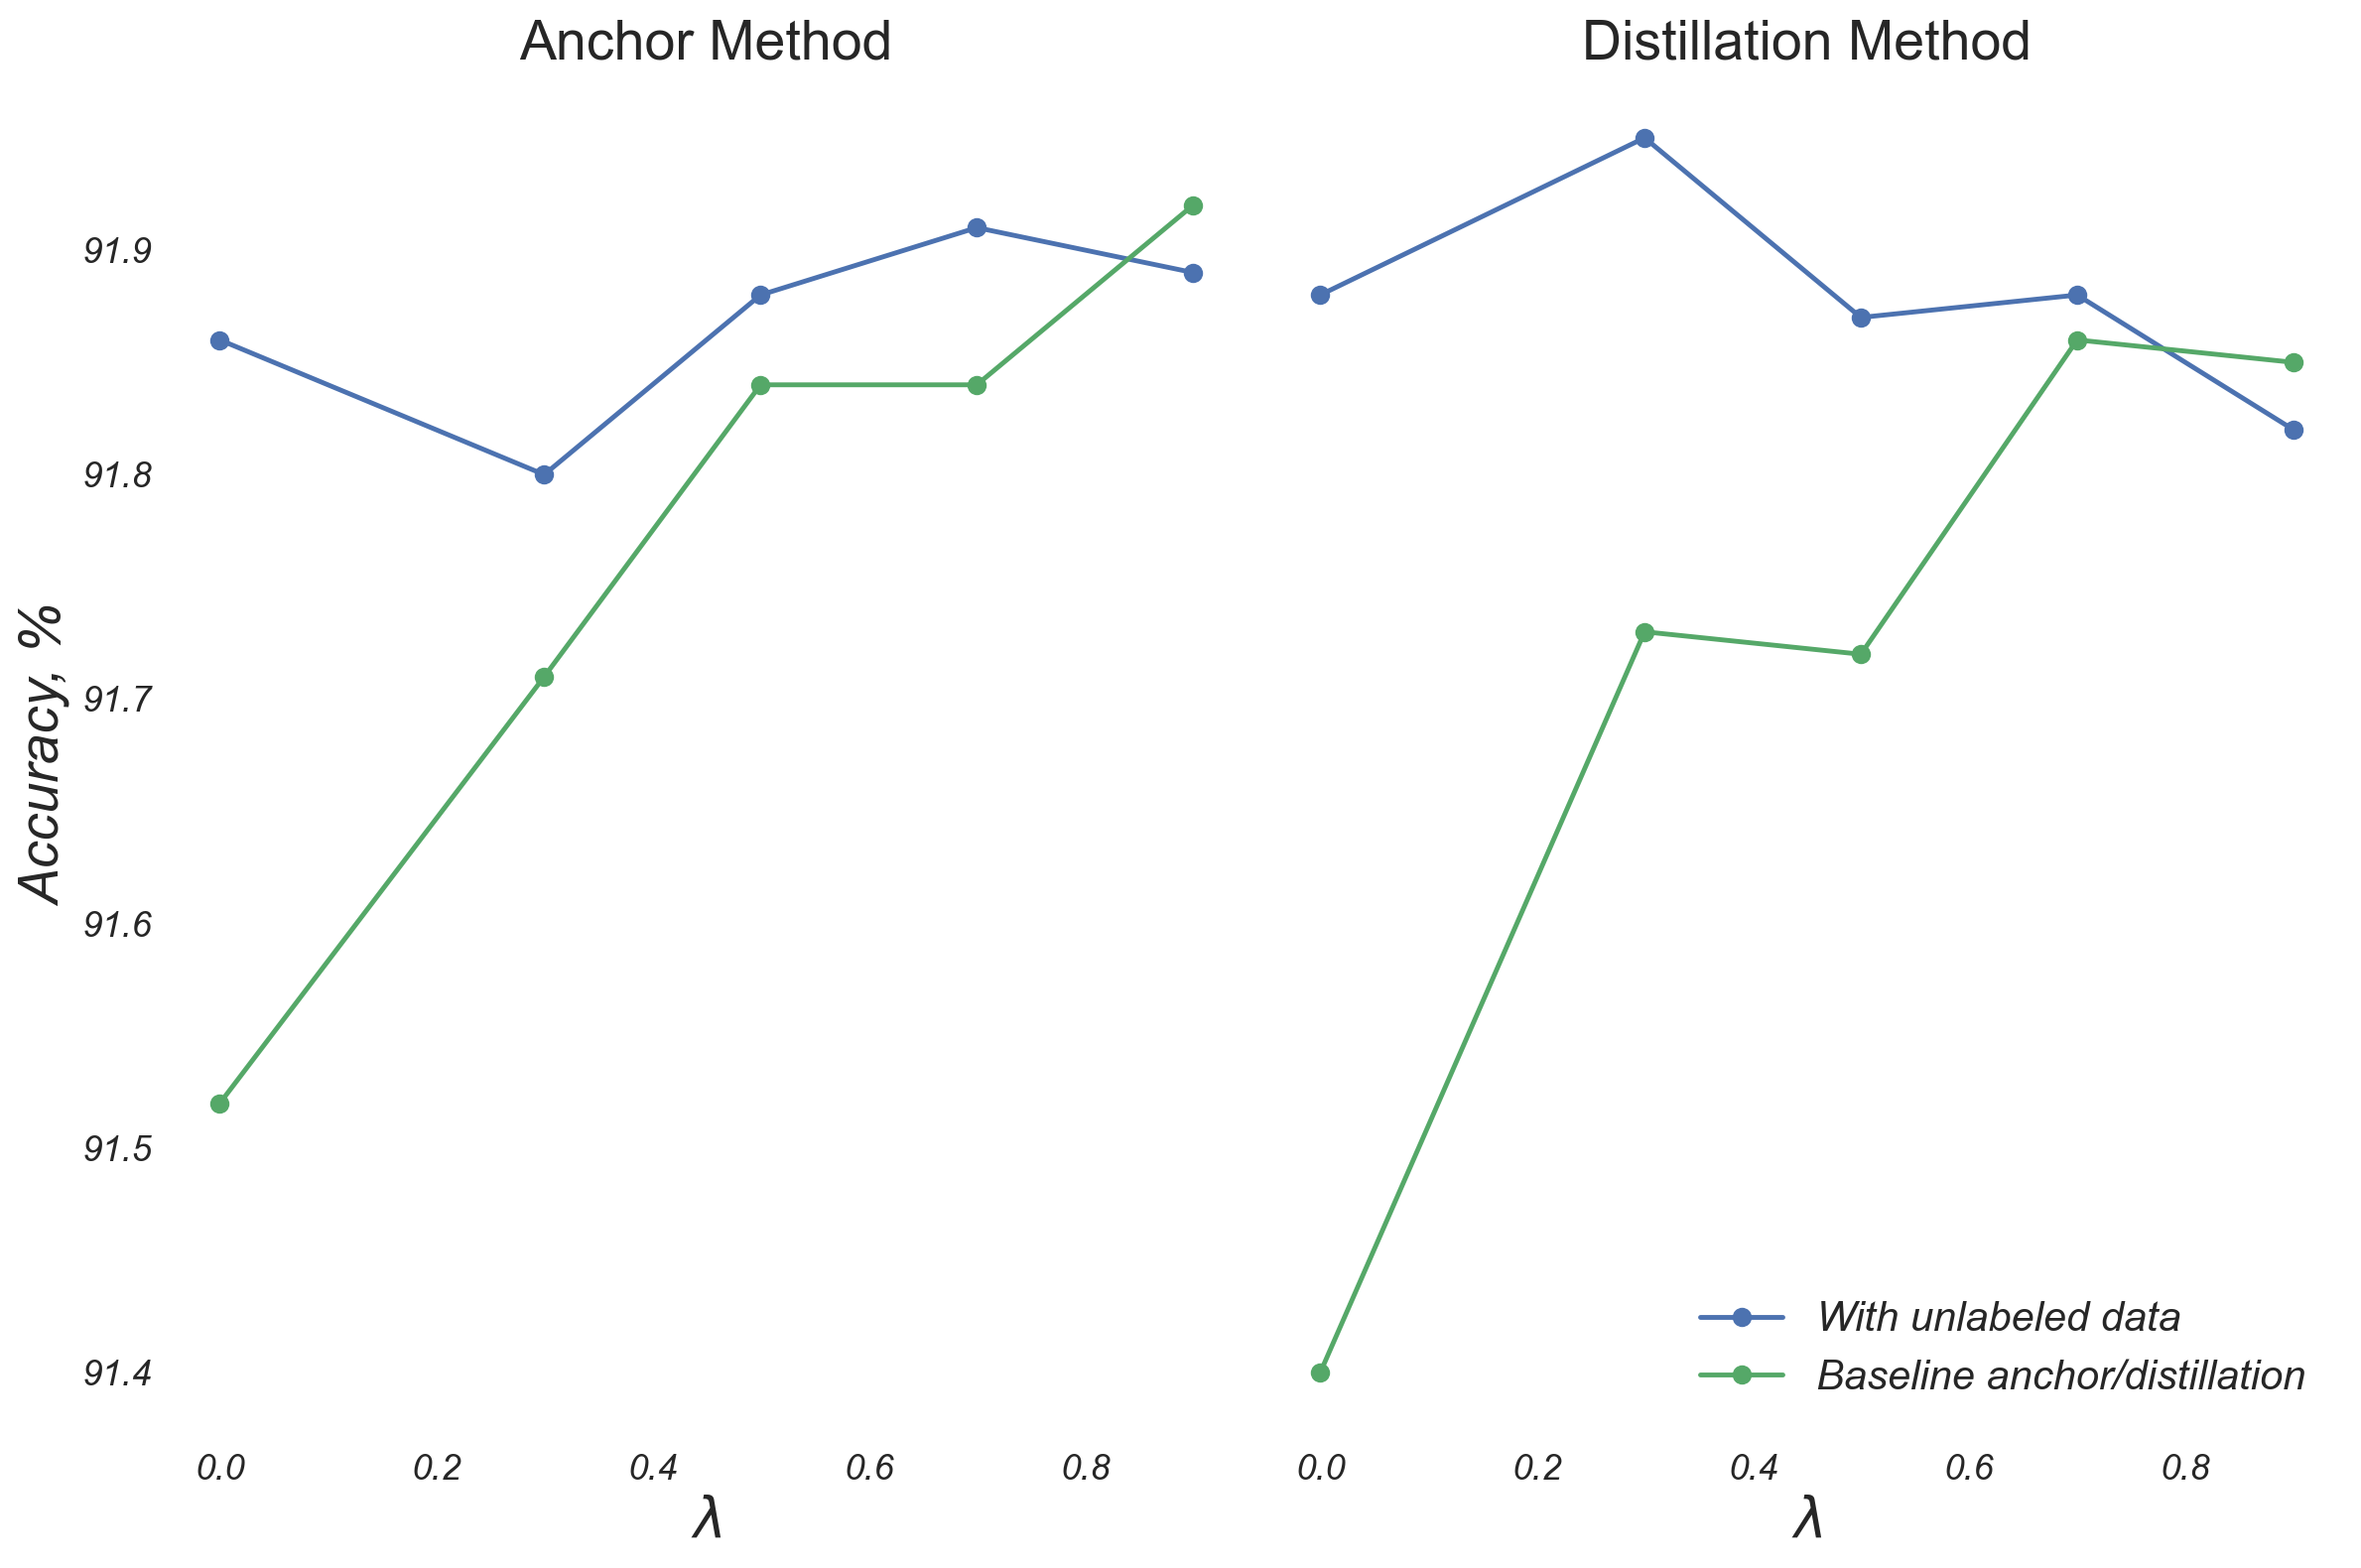

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True)

ax[0].plot(anchor_method['lambda'],
           anchor_method[('add_unlab', 'accuracies_val')],
           label='With unlabeled data',
           marker='o')

ax[0].plot(anchor_method['lambda'],
           anchor_method[('anchor', 'accuracies_val')],
           label='Baseline anchor',
           marker='o')


ax[1].plot(distillation_method['lambda'],
           distillation_method[('add_unlab', 'accuracies_val')],
           label='With unlabeled data',
           marker='o')

ax[1].plot(distillation_method['lambda'],
           distillation_method[('anchor', 'accuracies_val')],
           label='Baseline anchor/distillation',
           marker='o')

ax[0].set_title("Anchor Method", fontsize=20, style='normal')
ax[0].set_xlabel(r"$\lambda$", fontsize=20)
ax[0].set_ylabel("Accuracy, %", fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[1].legend(fontsize=15)
ax[1].set_title("Distillation Method", fontsize=20, style='normal')
ax[1].set_xlabel(r"$\lambda$", fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.savefig("../data/data_for_final_presentation/accuracy.png", dpi=300)
plt.show()

### Line plot for overall churn

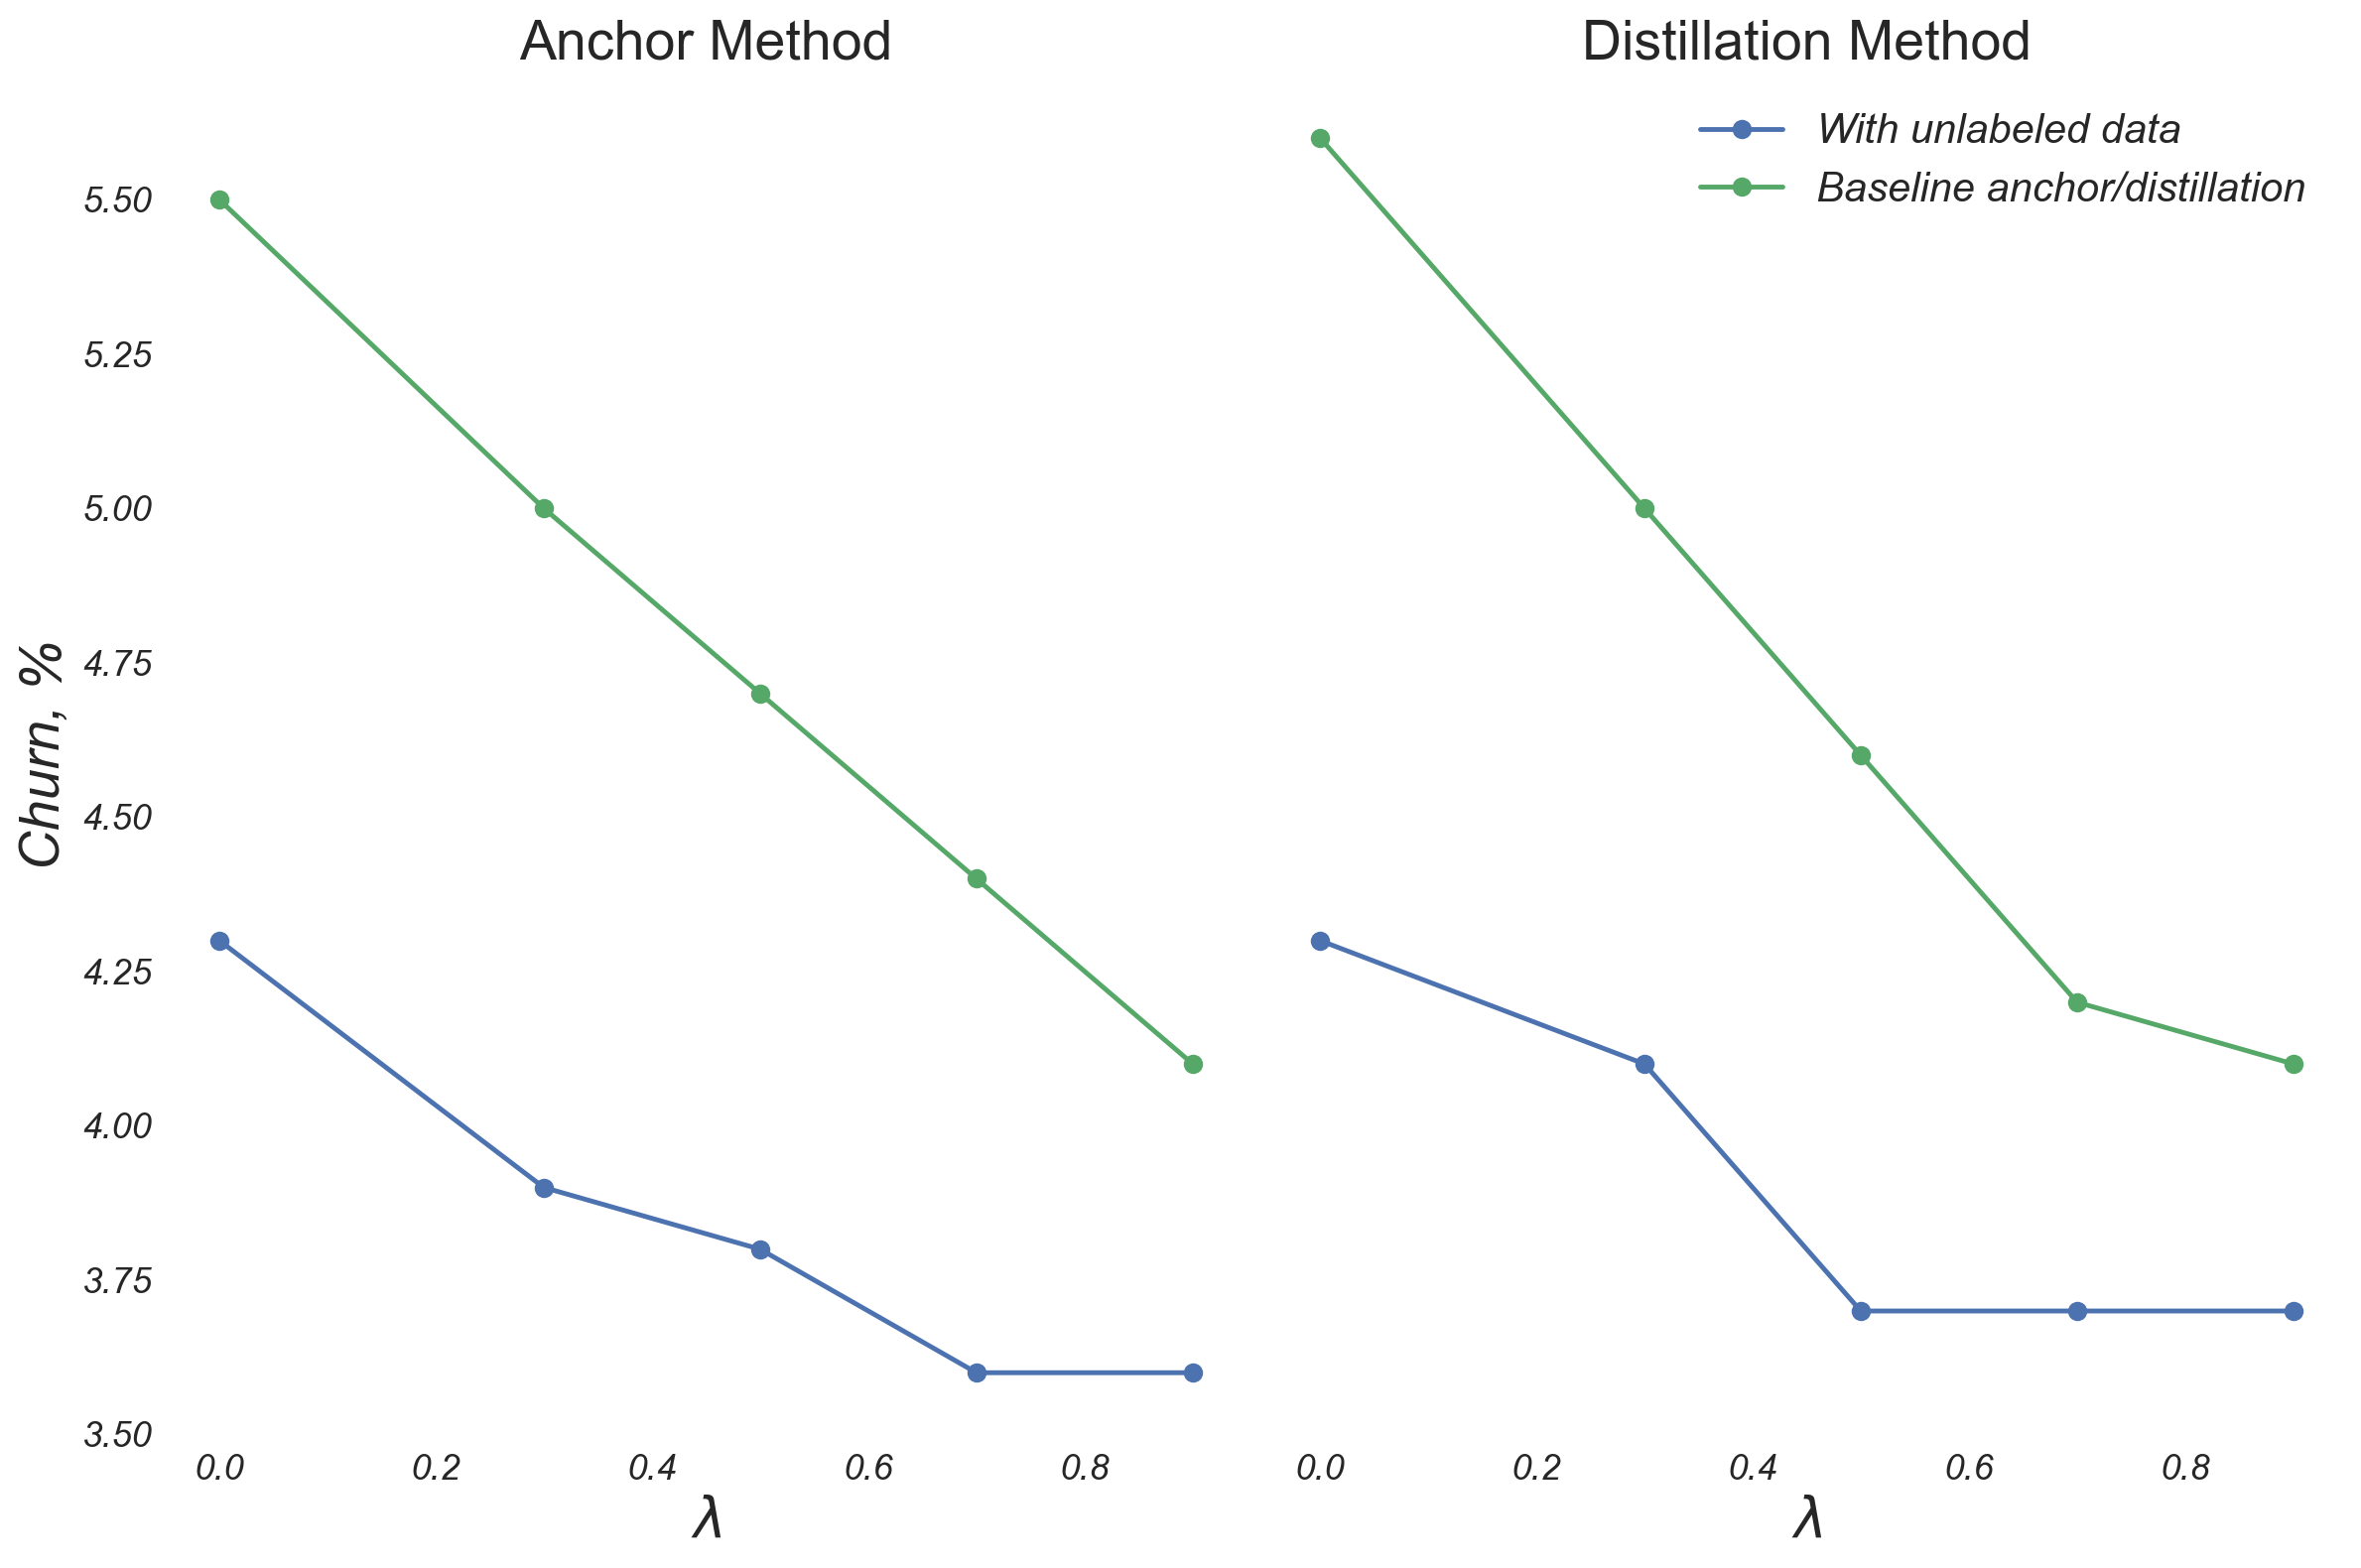

In [10]:
fig, ax = plt.subplots(1, 2, sharey=True)

ax[0].plot(anchor_method['lambda'],
           anchor_method[('add_unlab', 'overall_churn')],
           label='With unlabeled data',
           marker='o')

ax[0].plot(anchor_method['lambda'],
           anchor_method[('anchor', 'overall_churn')],
           label='Baseline anchor',
           marker='o')


ax[1].plot(distillation_method['lambda'],
           distillation_method[('add_unlab', 'overall_churn')],
           label='With unlabeled data',
           marker='o')

ax[1].plot(distillation_method['lambda'],
           distillation_method[('anchor', 'overall_churn')],
           label='Baseline anchor/distillation',
           marker='o')

ax[0].set_title("Anchor Method", fontsize=20, style='normal')
ax[0].set_xlabel(r"$\lambda$", fontsize=20)
ax[0].set_ylabel("Churn, %", fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=13)

ax[1].legend(fontsize=15)
ax[1].set_title("Distillation Method", fontsize=20, style='normal')
ax[1].set_xlabel(r"$\lambda$", fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.savefig("../data/data_for_final_presentation/overall_churn.png", dpi=300)
plt.show()

### Bar Plot

In [11]:
data_for_bar = pd.concat(
    [
        anchor_method[
            [
                ('composite', 'gchurn_change'),
                ('composite', 'bchurn_change')
            ]
        ].reset_index(),
        distillation_method[
            [
                ('composite', 'gchurn_change'),
                ('composite', 'bchurn_change')]
        ].reset_index()],
    axis=1)

data_for_bar.columns = [
    'a',
    'gchurn_change_anchor',
    'bchurn_change_anchor',
    'b',
    'gchurn_change_dist',
    'bchurn_change'
]
data_for_bar.drop(columns=['a', 'b'], inplace=True)

data_for_bar['lambda'] = [0.0, 0.3, 0.5, 0.7, 0.9]
data_for_bar = data_for_bar.abs()

In [12]:
data_for_bar['diff_anchor'] = (data_for_bar.bchurn_change_anchor - data_for_bar.gchurn_change_anchor)
data_for_bar['diff_dist'] = (data_for_bar.bchurn_change - data_for_bar.gchurn_change_dist)

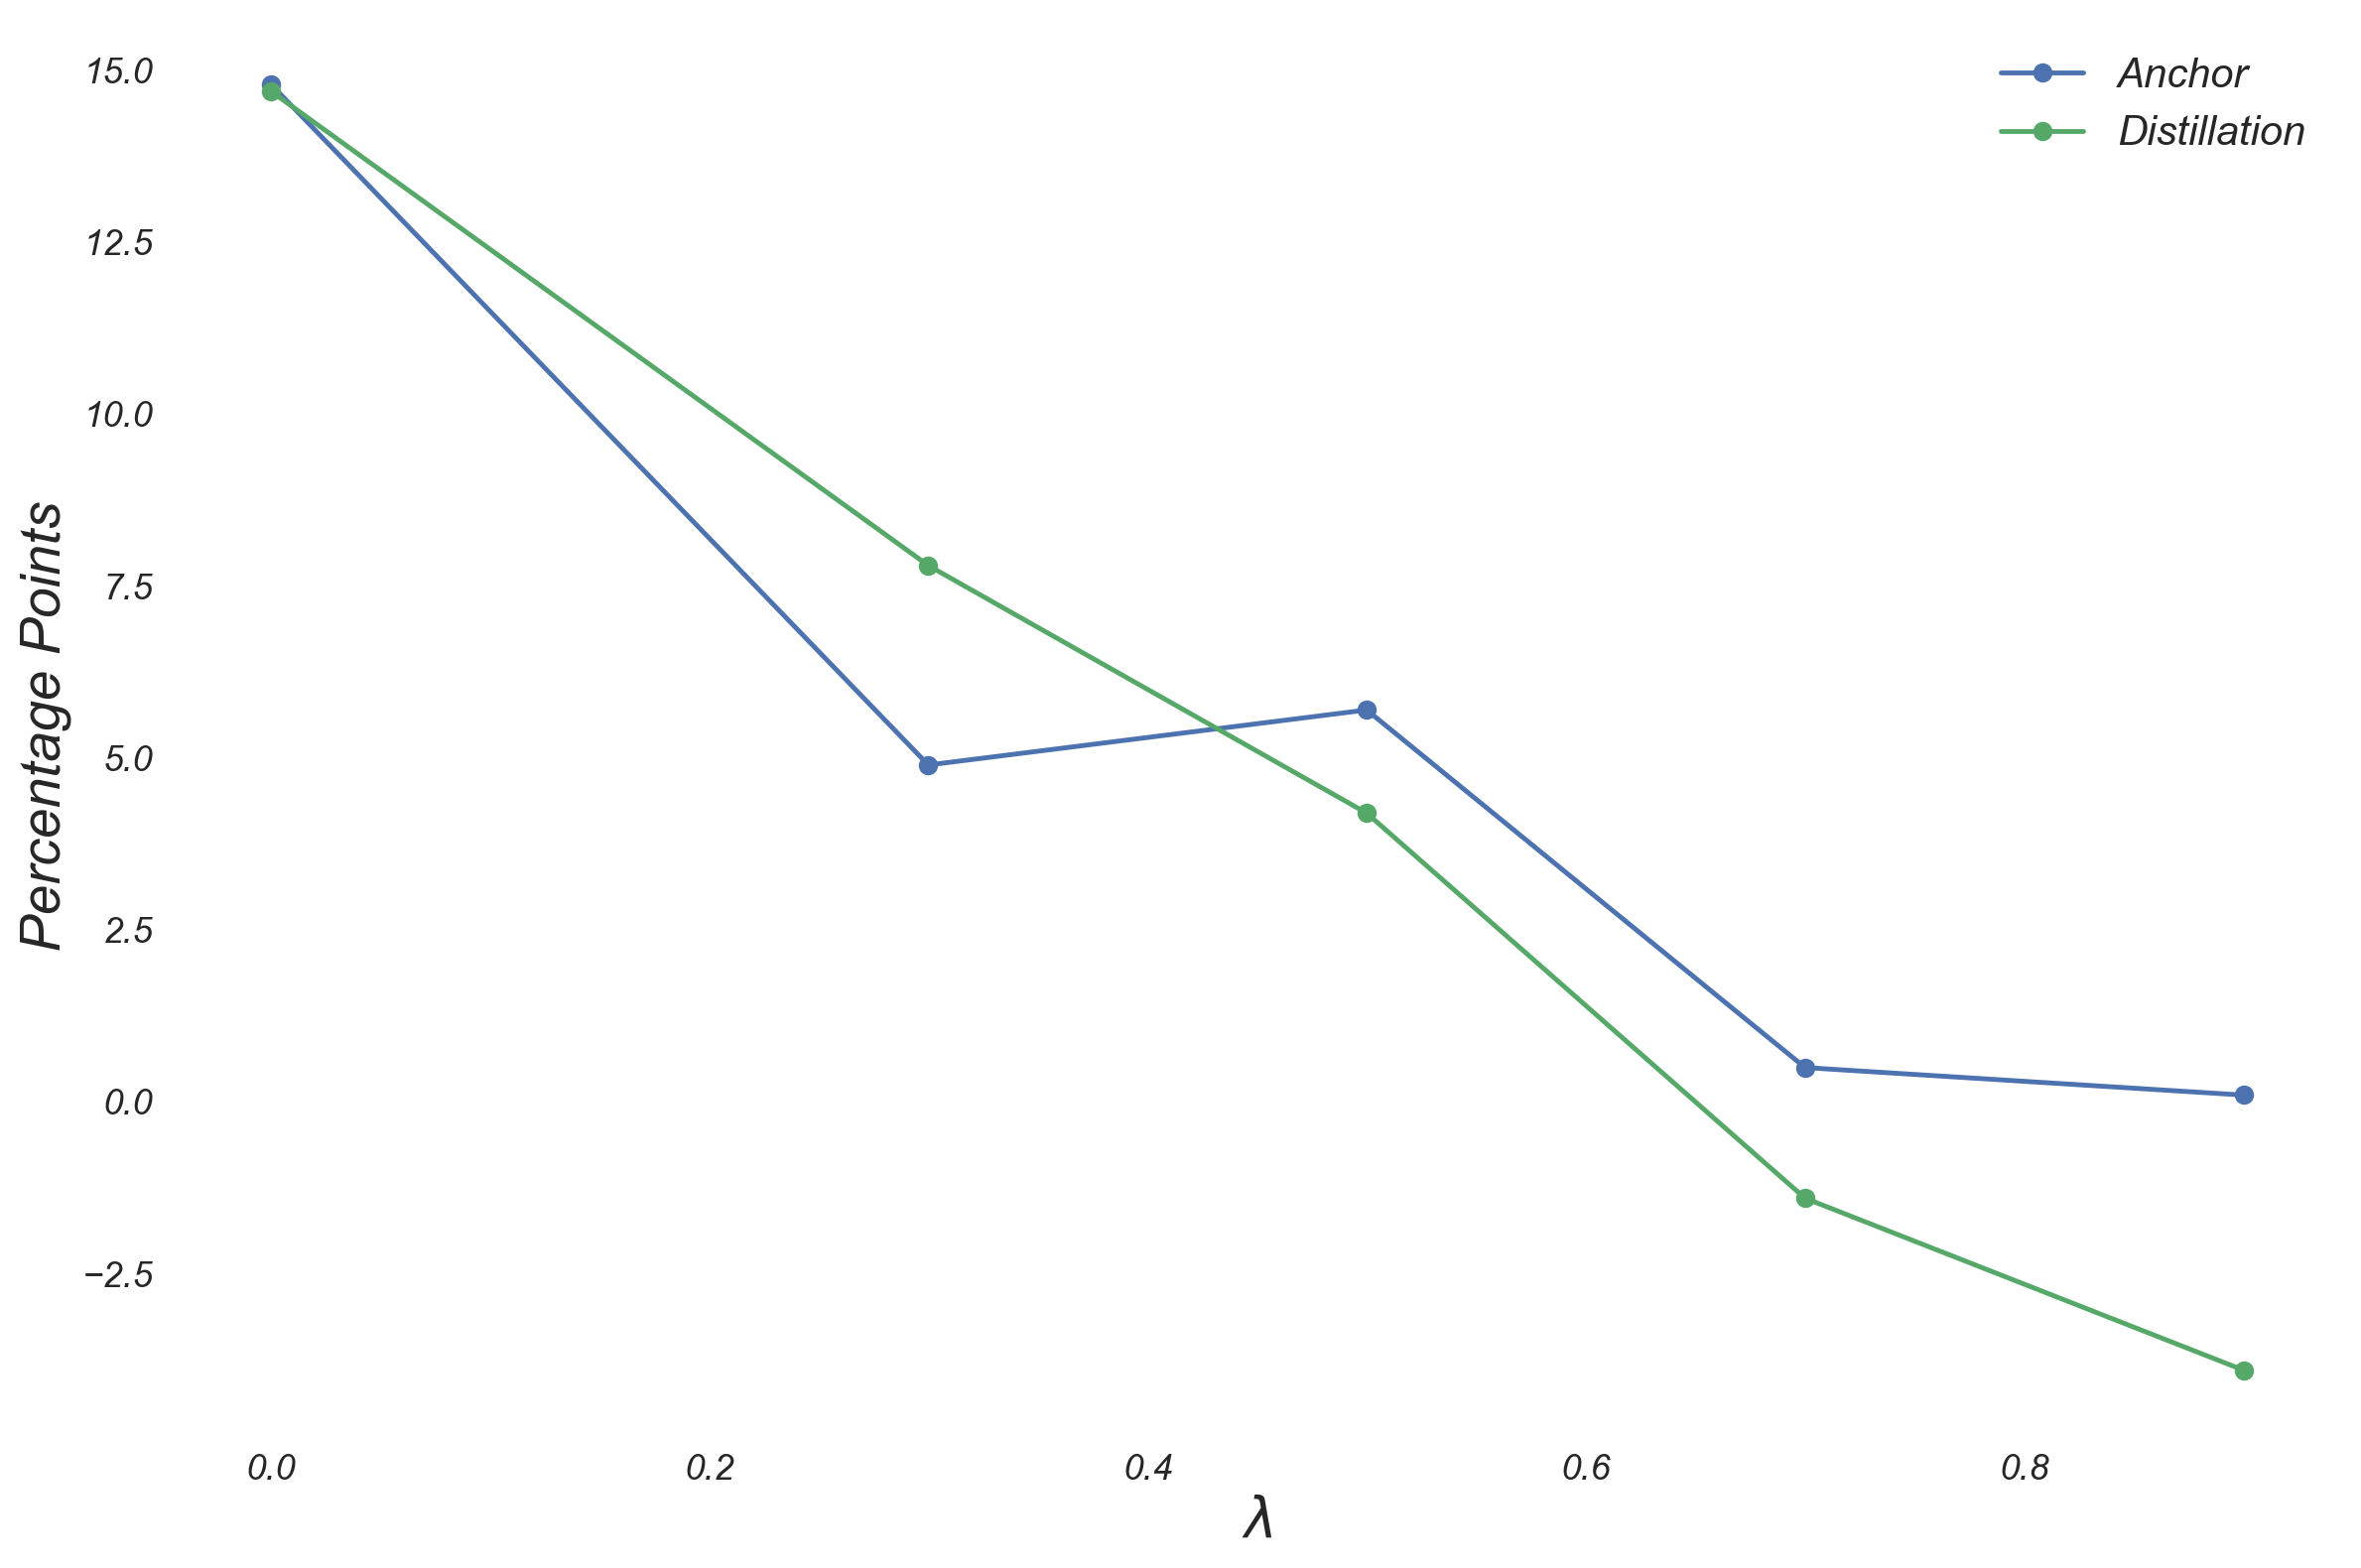

In [46]:
plt.plot(data_for_bar['lambda'], data_for_bar.diff_anchor, label='Anchor', marker='o')
plt.plot(data_for_bar['lambda'], data_for_bar.diff_dist, label='Distillation', marker='o')
plt.legend(fontsize=15)
# plt.title("Bad churn/good churn percentage change")
plt.xlabel(r"$\lambda$", fontsize=20)
plt.ylabel("Percentage Points", fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("../data/data_for_final_presentation/diff_in_diff.png", dpi=300)
plt.show()

### Line plot churn ratio

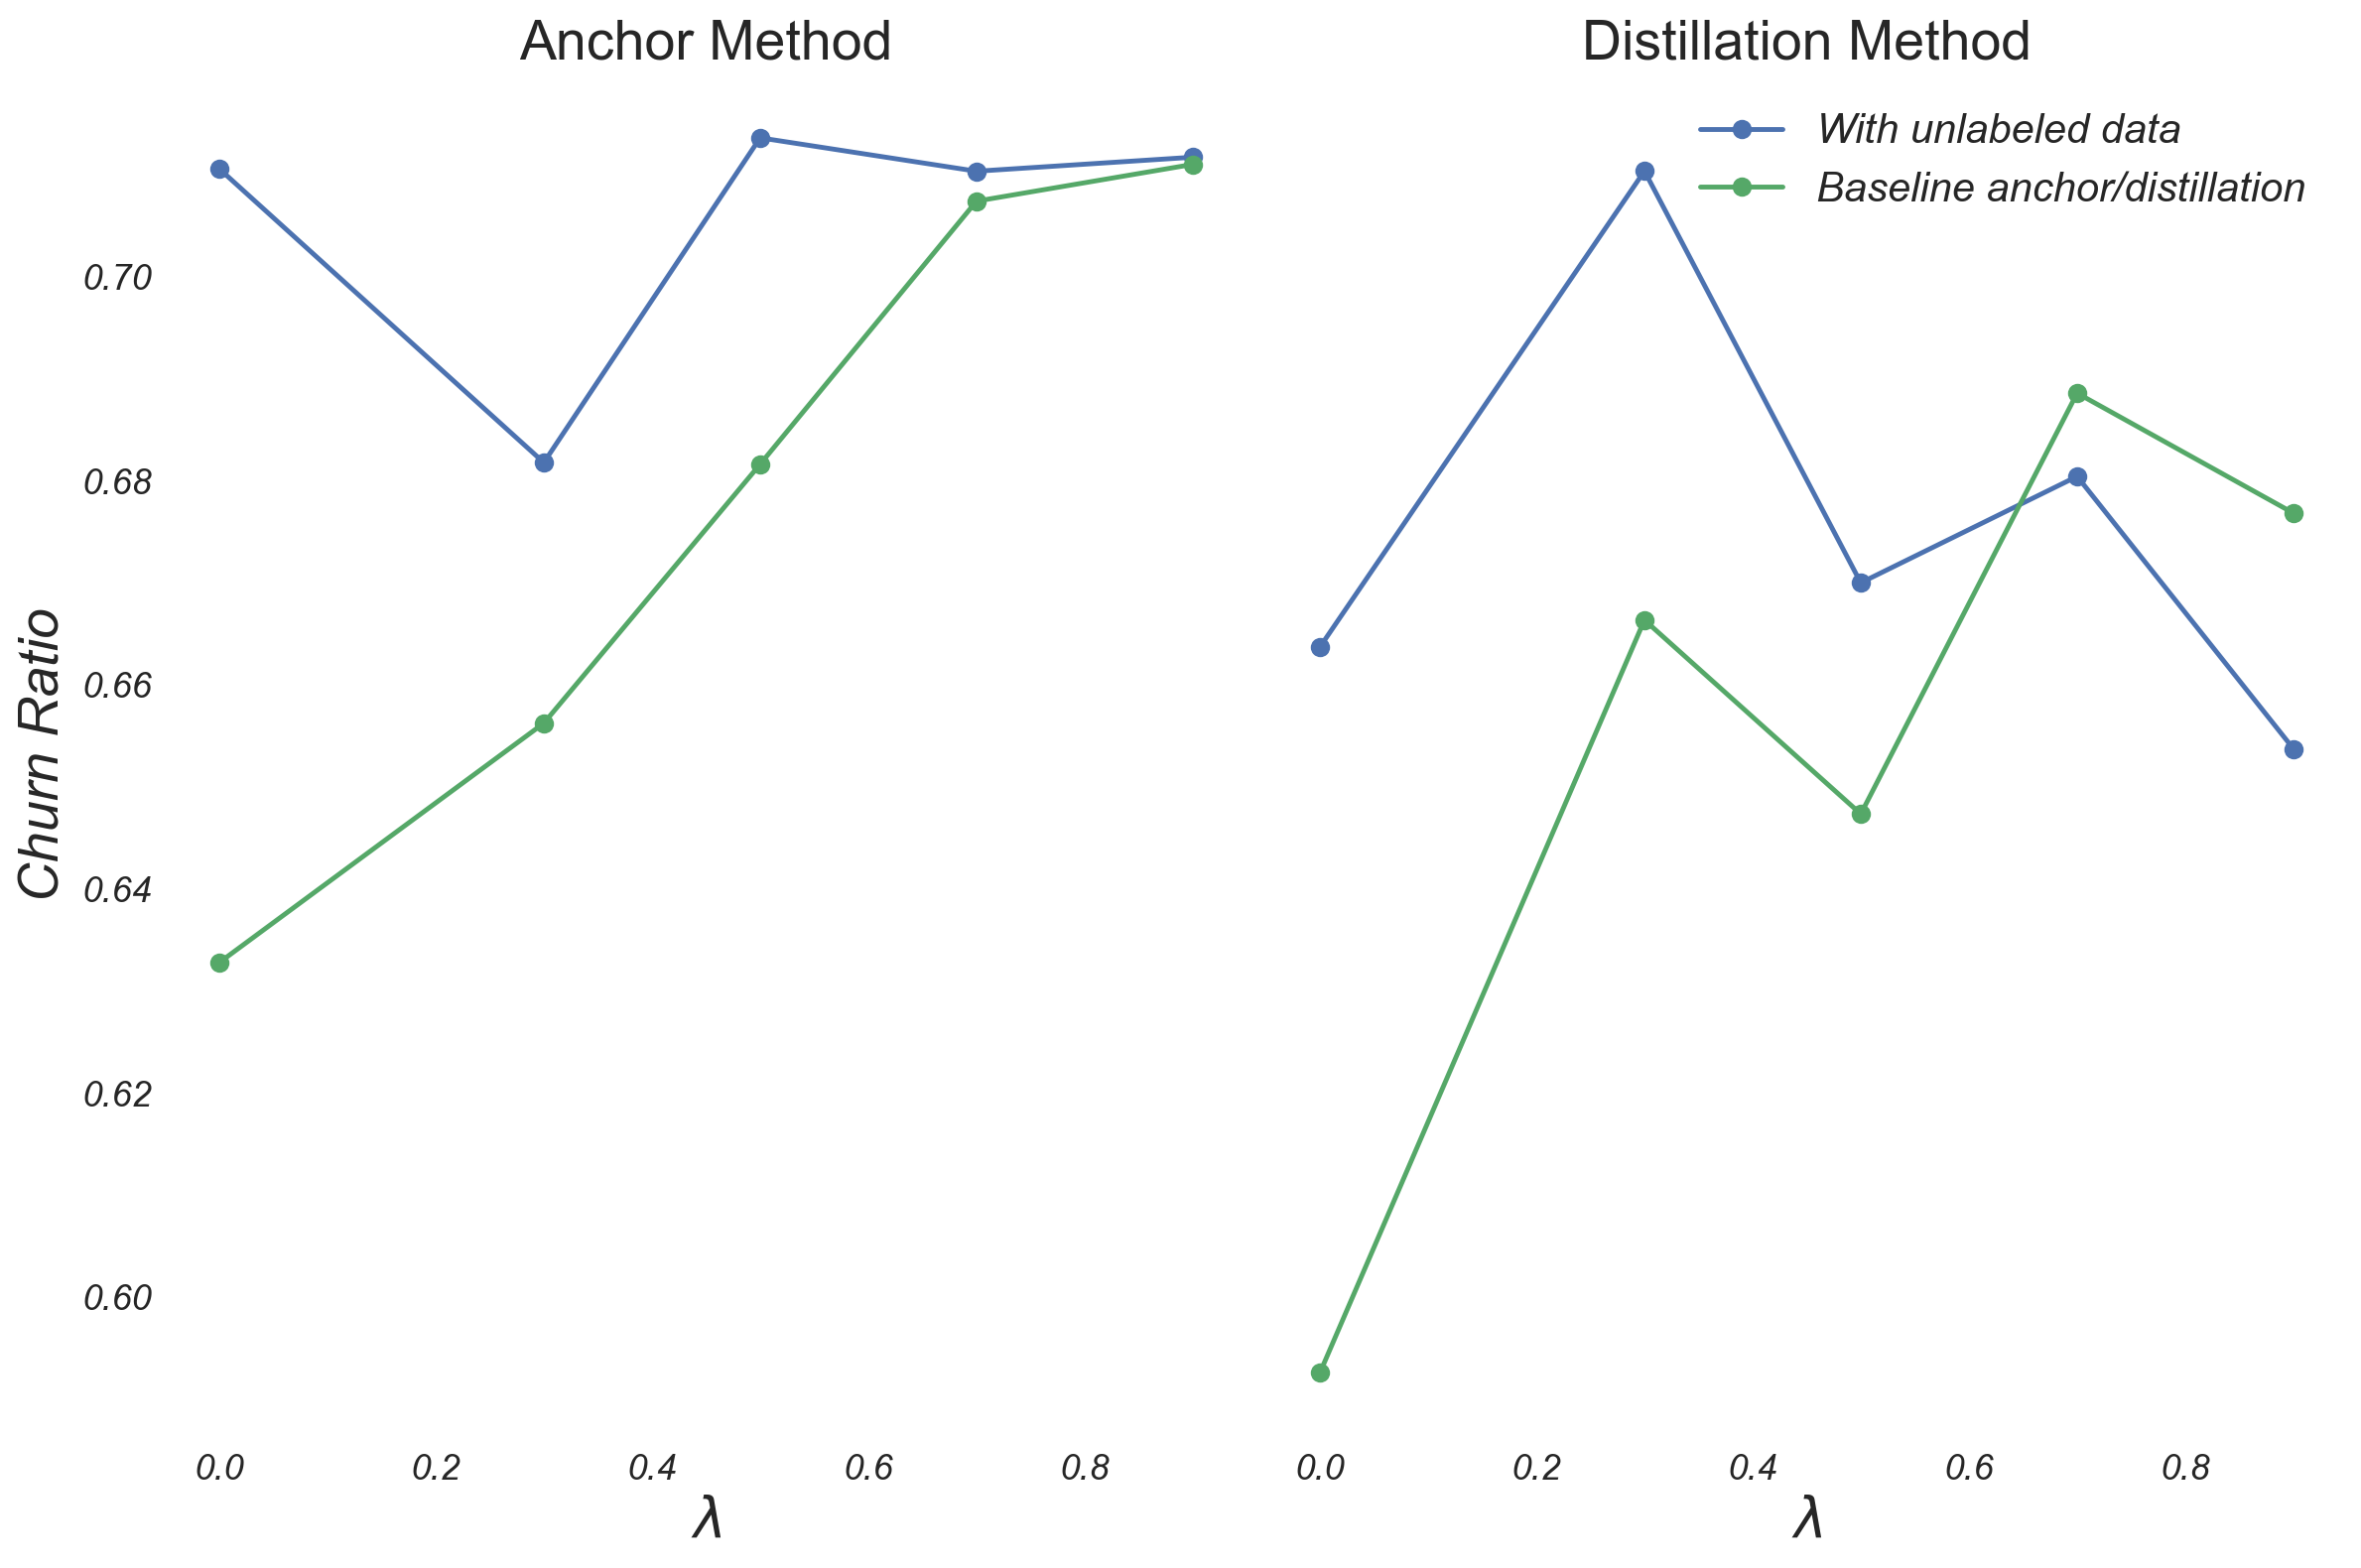

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True)

ax[0].plot(anchor_method['lambda'],
           anchor_method[('add_unlab', 'churn_ratio')],
           label='With unlabeled data',
           marker='o')

ax[0].plot(anchor_method['lambda'],
           anchor_method[('anchor', 'churn_ratio')],
           label='Baseline anchor',
           marker='o')


ax[1].plot(distillation_method['lambda'],
           distillation_method[('add_unlab', 'churn_ratio')],
           label='With unlabeled data',
           marker='o')

ax[1].plot(distillation_method['lambda'],
           distillation_method[('anchor', 'churn_ratio')],
           label='Baseline anchor/distillation',
           marker='o')

ax[0].set_title("Anchor Method", fontsize=20, style='normal')
ax[0].set_xlabel(r"$\lambda$", fontsize=20)
ax[0].set_ylabel("Churn Ratio", fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[1].legend(fontsize=15)
ax[1].set_title("Distillation Method", fontsize=20, style='normal')
ax[1].set_xlabel(r"$\lambda$", fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=13)

plt.tight_layout()
plt.savefig("../data/data_for_final_presentation/churn_ratio.png", dpi=300)
plt.show()